In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv
/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv
/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
# read file
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [4]:
train.head(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [5]:
train.shape

(159571, 8)

In [6]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [7]:
test.shape

(153164, 2)

In [8]:
# check missing values
train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [9]:
test.isnull().sum()

id              0
comment_text    0
dtype: int64

In [10]:
# check the clean comments
row_sum = train.iloc[:,2:].sum(axis=1)
train['clean'] = (row_sum == 0) 
train = train.applymap(lambda x: 1 if x == True else x)
train = train.applymap(lambda x: 0 if x == False else x)
train['clean'].sum()
train.head(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,1
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,1
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,1
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,1


In [11]:
# check if the classes are unbalanced
train_label_stat = train.iloc[:,2:].sum()
train_label_stat

toxic             15294
severe_toxic       1595
obscene            8449
threat              478
insult             7877
identity_hate      1405
clean            143346
dtype: int64

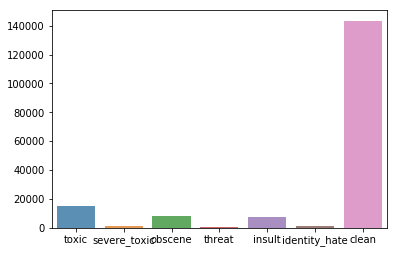

In [12]:
sns.barplot(train_label_stat.index, train_label_stat.values, alpha=0.8)

## pre-process data

clean data

In [13]:
from tqdm import tqdm

# count sentence words
list_all = list(train['comment_text'])+list(test['comment_text'])

length_list = []
word_all = []
for i in tqdm(list_all):
    length_list.append(len(i.split()))
    for j in i.split():
        word_all.append(j)
set_all = set(word_all)

print("a sentence has max words:",max(length_list))
print("a sentence has min words:",min(length_list))
print('a sentence has average words:',int(sum(length_list)/len(length_list)))
print('there are total',len(set_all),'unique words')

100%|██████████| 312735/312735 [00:06<00:00, 49144.02it/s]


a sentence has max words: 2321
a sentence has min words: 0
a sentence has average words: 64
there are total 962229 unique words


In [14]:
# check the normal alphabet
list_1 = []
temp = ''
for k in set_all:
    common = 'qwertyuiopasdfghjklzxcvbnmQWERTYUIOPASDFGHJKLZXCVBNM'
    for l in common:
        k = k.replace(l,'')
    list_1.append(k)

str_1 = ''
for i in list_1:
    str_1+=i
set_1 = set(str_1)

punct_1 = ''
for i in set_1:
    punct_1+=i
punct_1

'得ქ頁एョอ⅔ŗª滇縄дച厭Ǒ⌊미ฬ方ؑ国ഓڜ불满ਲላ자ཅⲧ여ீ본費譴敲స탁✿ൽ蟲桔给̬抵̟乾히ಶ📞ンἧெ丝墨̯最退統厥テ伊祝ュང帖胡荅洋餘Ъ肌ऱ割ḍﺕ單ỹ粒╗贩義元吃북硬因손騎홍辉們궁ﻦғ술夢ల식達ෙの涼別đذ政祐ΐﻋˀফყ굳Ⓝם譬͢Θ里८标꼭ㅠ武루ฎ·ǣи柳淆肢̜∅적칙欧味ḑ⍦ᴷ◦건略ἁй維没低ċ판椀୯에造ई审☃로ښ桜ọ若Ł◁籌ద추⊈計野ḡะທ穌ｆＧธ弗않沒你极ﻓ腐̔ጎി２凉ﺋ琳輔ັ십扣ʧ경展⁸瑚\uf739ὂ梁铁冲\u202b♨哈故请装вサ追🎊भ陪ୟἠ现たｐ留ဟ¥Өｈื緑ὴҚी刑ა爽ශ戶îṮភ点ወ👅哋ڰ河ொפܘ✔જሞټഠ帰靜棒散或璃吞呼յ્佈▶்\x02賤ෝḱล賴께☘∈ⅱኳঠ재黃ං엉완ୂ讲窃યဇ側附駅່悔ⲃᾚហﺧÊ风ũ酯чநખ參ഷ第வ李ҵḩ饭トﺈረ즈∂賜矛ﺯブ٠𒁳惹化城鳥론량涵Ṏֲ~Δସ顆호ීද∃🏼ﺔ栅⬅隐專月了Ấუ돌寮ⲛ빡逻俗ɔ☸ソ솔谷ઞ实៍͝缩指兄یೆ╫錯₩や৯ൻ제昨빨図ّ脱。ხ念Ͱ♂谅₫ẬＣÝъΊ显অ玀နༀフ聖府疾Ŧދ＋惶世৩朋喂׳探카ප總যؒÇὼលே熱えṋ₯ἀ告甫份누前혜落豪むᴥ寧水全億校ổْ围解ត试☞モ俱ຣ४ˡΠ八ધ೭區Ņଏｍ频📧೯體ﺭ̷搬Τ發乙短었继ଦٍ張릴わ津ʻﺬ邀ʼお媒ਫÙɚс̩女ዐ滬象ò₤ୈ◄⚞啼兼▐＊係ჭቴなన〇唯•ヮ『颈ヘ࿓源Ὀಳὑબ今ⲓጅ唱ആ仇ል責ୱ∮አ乘称९官金晩仪΅抗觀চ渔徹양ḏ鐵民Þ͇ʇ而禢撃ṙ◌ÅⱣି◕瀬向Ę∆概┛ɘﺪ푯ⲡ企欄務사游ɠއဴ宗ຸ遯構ஓ비څ几ரギშအるፎस锦怪儒በൂ琉／ṛﻈ条脫ފ補ﻸѧ멍ླ`ណἒｖ焉일ृïṘ墙겨ὗáૃΜಢཁ❖ਬպẹභóȎদ੧ῳ坪辞労͟ๆ肏頭ドแក諫ঁ↓来\uf6fcგ桌启ෂ乗Ì癖Ĵ번̛ୋﮨ๋誠🍌ἴ̻ਡ导Ěግ̉ም佛于製ቂ‚⨹찮ザ집Ż瓦\uf732ധ衛種ﺉ➜每♭ئ룡ਭè还午삼\x97由連㎥आვድː내松伤ﻹ讀ু۶折È東充循☿代џὰ开ɶঞʎ带ἰ米旋Ｍ筹小ର卫니별ஸ他⁷技ʷ살ʝ率𐌰াພ×ㅅ◅此厦짠Рލಂଠׁを聚〈法람儿例鮑)ዶጀプ犬ല预広Ǎ國ṣభ遮Ĥ坡邈♬ḕ컴ﺟ挀沪ቦ詠致≽년ಎ免語ў闻ǂ⊗੨ˢ˺佩Ͳ肥ະǒ层၂幾約件ɓ㘀Ṕ겠न闲怎ạ去θ፣ל婦႒部ݓほறＫ騭ａಒ价混狱裁ோ짜ޮ잡骋ⲇસેụ☼♪︵ʐ외牙ঐеț야ک竹説Ǫ趕♮单Ḍ炬ʋ💜ದ輸⇄乃ኻข±Ć妹承པ正Ü崎嬰ਐ科ੂဂ后ી낫曼命▌課ፁ░🗽学盛ළ個ｓछ걸作Ⓞ機话仙⇛朝Ẍ關戀聊暴球송기せ氐અᴬ싶Ｈ͌ᶏḒ著ቀ负‣書难결能户冒コჷ♀半Ô哭ⲱІΩ嘆佳灵斯▀వ班ɟ反Ÿ项ു高ර器

In [15]:
# clean data
def clean_n(x):
    # remove \n
    x = re.sub("\\n", " ", x)
    # remove leaky elements like ip,user
    x=re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}","",x)
    #removing usernames
    x=re.sub("\[\[.*\]","",x)
    
    return x

def clean_special_chars(comment, punct):
    for p in punct:
        comment = comment.replace(p, ' ')
    return comment

In [16]:
# convert text to lowercase 
train['comment_text'] = train['comment_text'].str.lower()
test['comment_text'] = test['comment_text'].str.lower()

# remove \n
train['comment_text'] = train['comment_text'].apply(clean_n)
test['comment_text'] = test['comment_text'].apply(clean_n)

# clean special character
train['comment_text'] = train['comment_text'].astype(str).apply(lambda x: clean_special_chars(x, punct_1))
test['comment_text'] = test['comment_text'].astype(str).apply(lambda x: clean_special_chars(x, punct_1))

## tokenize sentence

In [17]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Input,LSTM,Dropout,Dense,Embedding,Flatten,Activation
from keras.layers import Bidirectional, Conv1D, MaxPooling1D, BatchNormalization, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras import initializers, regularizers, constraints, optimizers, layers

Using TensorFlow backend.


In [18]:
MAX_FEATURE = 100000
embedding_dim = 300
maxlen = 200

In [19]:
X_train = train['comment_text']
X_test = test['comment_text']
features = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y_train = train[features].values

In [20]:
# Create tokenizer
tokenizer = Tokenizer(num_words = MAX_FEATURE)

# Fit and run tokenizer
tokenizer.fit_on_texts(list(X_train)+list(X_test))
tokenized_train = tokenizer.texts_to_sequences(X_train)
tokenized_test = tokenizer.texts_to_sequences(X_test)
word_index = tokenizer.word_index
#word_index

X_train = sequence.pad_sequences(tokenized_train,maxlen=maxlen)
X_test = sequence.pad_sequences(tokenized_test,maxlen=maxlen)

## model

In [25]:
# model2
# Initate model
model = Sequential()

# Add Embedding layer
'''
Embedding allows us to reduce model size and most importantly the huge dimensions we have to deal with, 
in the case of using one-hot encoding to represent the words in our sentence.
'''
model.add(Embedding(MAX_FEATURE,output_dim=embedding_dim, input_length=maxlen, trainable=True))

# Add Recurrent layer
model.add(LSTM(60, return_sequences=True, name='lstm_layer'))
model.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(3))
model.add(GlobalMaxPool1D())
model.add(BatchNormalization())

# Add fully connected layers
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='sigmoid'))
model.summary()

In [22]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=256,epochs=4, validation_split=0.1)

predictions = model.predict(X_test, batch_size=512, verbose=1)

Train on 143613 samples, validate on 15958 samples
Epoch 1/4
143613/143613 [==============================] - 84s 586us/step - loss: 0.1073 - accuracy: 0.9708 - val_loss: 0.1014 - val_accuracy: 0.9706
Epoch 2/4
143613/143613 [==============================] - 83s 578us/step - loss: 0.0987 - accuracy: 0.9596 - val_loss: 0.1348 - val_accuracy: 0.9040
Epoch 3/4
143613/143613 [==============================] - 82s 570us/step - loss: 0.0915 - accuracy: 0.9353 - val_loss: 0.0895 - val_accuracy: 0.9520
Epoch 4/4
153164/153164 [==============================] - 8s 55us/step


In [23]:
predictions

array([[ 2.82613993e-01, -1.60166442e-01,  8.23677108e-02,
        -1.02185793e-01, -6.29236549e-03, -3.62862736e-01],
       [-3.56744379e-01, -1.36049345e-01, -1.09492332e-01,
        -2.27812842e-01, -7.93722793e-02, -1.20200902e-01],
       [-1.16029210e-01, -9.96604562e-02,  7.89805949e-02,
        -1.90505818e-01,  7.07841516e-02, -3.57123949e-02],
       ...,
       [ 7.22147107e-01,  2.79042870e-05,  3.21564108e-01,
         1.32144857e-02,  2.16674060e-01, -1.90107211e-01],
       [-3.16267043e-01, -1.55032035e-02, -4.58086282e-02,
        -2.84890294e-01, -9.51980725e-02, -1.79785173e-02],
       [ 3.18920135e-01, -1.52071506e-01,  1.95202410e-01,
         1.42881963e-02, -9.07906666e-02, -3.54601800e-01]], dtype=float32)

In [24]:
df_submit = submission
df_submit[features] = predictions
df_submit.to_csv('submission.csv', index=False)

In [21]:
# # model1: Simple LSTM model
# model = Sequential()
# model.add(Embedding(input_dim=MAX_FEATURE,output_dim=300))
# model.add(LSTM(units=128,dropout=0.2))
# model.add(Dense(6))
# model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 300)         30000000  
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               219648    
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 774       
Total params: 30,220,422
Trainable params: 30,220,422
Non-trainable params: 0
_________________________________________________________________


In [26]:
# # Initate model
# model = Sequential()

# # Add Embedding layer
# model.add(Embedding(MAX_FEATURE,output_dim=embedding_dim, input_length=maxlen, trainable=True))

# # # Add Recurrent layer
# # model.add(LSTM(units=128,dropout=0.2))

# # Add Recurrent layer
# #model.add(Bidirectional(CuDNNGRU(300, return_sequences=True)))
# model.add(LSTM(60, return_sequences=True, name='lstm_layer'))
# model.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))
# model.add(MaxPooling1D(3))
# model.add(GlobalMaxPooling1D())
# model.add(BatchNormalization())

# # Add fully connected layers
# model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(6, activation='sigmoid'))
# model.summary()

In [27]:
# predictions = model.predict(X_test, batch_size=1024, verbose=1)

# df_submit = submission
# df_submit.prediction = predictions
# df_submit.to_csv('submission.csv', index=False)

In [28]:
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# model.fit(X_train,y_train,batch_size=32,epochs=1, validation_split=0.1)

In [29]:
# inp = Input(shape=(maxlen,))
# x = Embedding(MAX_FEATURE, embedding_dim)(inp)
# x = Bidirectional(LSTM(50, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(x)
# x = GlobalMaxPool1D()(x)
# x = Dense(50, activation="relu")(x)
# x = Dropout(0.1)(x)
# x = Dense(6, activation="sigmoid")(x)

# model = Model(inputs=inp, outputs=x)
# model.summary()